# Use this notebook in the same directory as your FSEC data files.

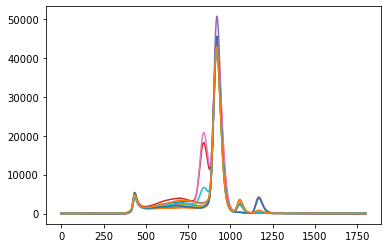

In [7]:
import glob
file_list = [f for f in glob.glob("*.txt")]
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

for file in file_list:
    raw_file = open(str(file))
    read_file = raw_file.read()
    line_list = read_file.split('\n')
    start = line_list.index('Em. Wavelength(nm)	507')
    end = line_list.index('[LC Status Trace(Pump A Pressure)]')
    intensities = []
    time = []
    for line in line_list[start+2:end-1]:
        tab = line.index('\t')
        intensities.append(int(line[tab+1:15]))
        time.append(float(line[0:tab]))
    plt.plot(np.arange(len(intensities)),intensities)
    plt.savefig('fig1.png', dpi = 300)
plt.show()


<_io.TextIOWrapper name='fig1.png' mode='r' encoding='UTF-8'>
